In [1]:
# import modules
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tqdm import tqdm
from scipy import stats
from scipy.stats import zscore


# inline plots
%matplotlib inline

In [2]:
# read the ADNI data
dat_all = pd.read_excel('ADNI_ICM_random200.xlsx')
dat_all = dat_all.replace({'\'':''}, regex=True) # remove ' ' from data
dat_all = dat_all.rename(columns=lambda x:x.strip('\'')) # remove ' ' from column names
dat_all.index += 1 # change index to start at 1
#dat_all

In [3]:
# select only the columns of interest
rois = ['IFG_opercularis_L','IFG_orbitalis_L','IFG_triangularis_L','LFOG_L','MFG_L','MFOG_L','PrCG_L','SFG_L',
       'IFG_opercularis_R','IFG_orbitalis_R','IFG_triangularis_R','LFOG_R','MFG_R','MFOG_R','PrCG_R','SFG_R']
info = ['Subject_ID', 'Gender', 'Age', 'Diagnosis']
columns = np.concatenate((info, rois), axis=0)
dat = dat_all[columns]
#dat

# Chenyu's addition Starts here.


Null hypothesis: age does not have an effect on structure volume in frontal lobe.


In [ ]:
import scipy.stats
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification



In [19]:
#create a dataframe for this section
dat_h_age = dat.copy()
dat_h_age['Total_Frontal Lobe'] = dat_h_age[rois].sum(axis=1)
dat_h_age


,Subject_ID,Gender,Age,Diagnosis,IFG_opercularis_L,IFG_orbitalis_L,IFG_triangularis_L,LFOG_L,MFG_L,MFOG_L,...,SFG_L,IFG_opercularis_R,IFG_orbitalis_R,IFG_triangularis_R,LFOG_R,MFG_R,MFOG_R,PrCG_R,SFG_R,Total_Frontal Lobe
1,Subject_1,M,69.6712,AD/MCI,3398,4070,3400,4822,7828,5186,...,11247,2923,3643,2238,4765,6578,4822,15284,9210,102026
2,Subject_2,F,85.3836,AD/MCI,2874,4022,3388,3268,7585,3534,...,9028,2752,2707,2937,4013,6798,4145,13123,8699,89861
3,Subject_3,F,86.2904,NORMAL,3056,3199,2607,4144,7120,4932,...,9129,3048,3040,2025,3801,6914,4377,14087,8692,90600
4,Subject_4,M,73.9342,NORMAL,3231,3401,4262,3798,6933,4880,...,11068,2647,2464,3115,3940,8431,4240,14588,8519,98081
5,Subject_5,M,79.9918,AD/MCI,3775,3331,3260,4700,8987,4150,...,10262,4290,2792,3413,4726,7612,3989,15189,8834,102506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196,Subject_196,F,81.1425,NORMAL,2371,2625,2186,4121,6584,3558,...,10265,2487,1975,1869,3713,7335,3596,13992,6912,84506
197,Subject_197,M,85.1589,AD/MCI,2698,2565,2955,4384,7249,3927,...,10365,2573,2621,2297,3987,8237,4206,13327,7708,90406
198,Subject_198,F,66.9014,AD/MCI,3068,3168,3530,4055,8214,3960,...,9327,3432,2607,3524,3633,7469,4091,13808,8070,93843
199,Subject_199,F,77.0932,NORMAL,2747,3958,3091,4454,8680,4635,...,9150,2256,2682,2466,3986,8560,4956,13666,8295,94285


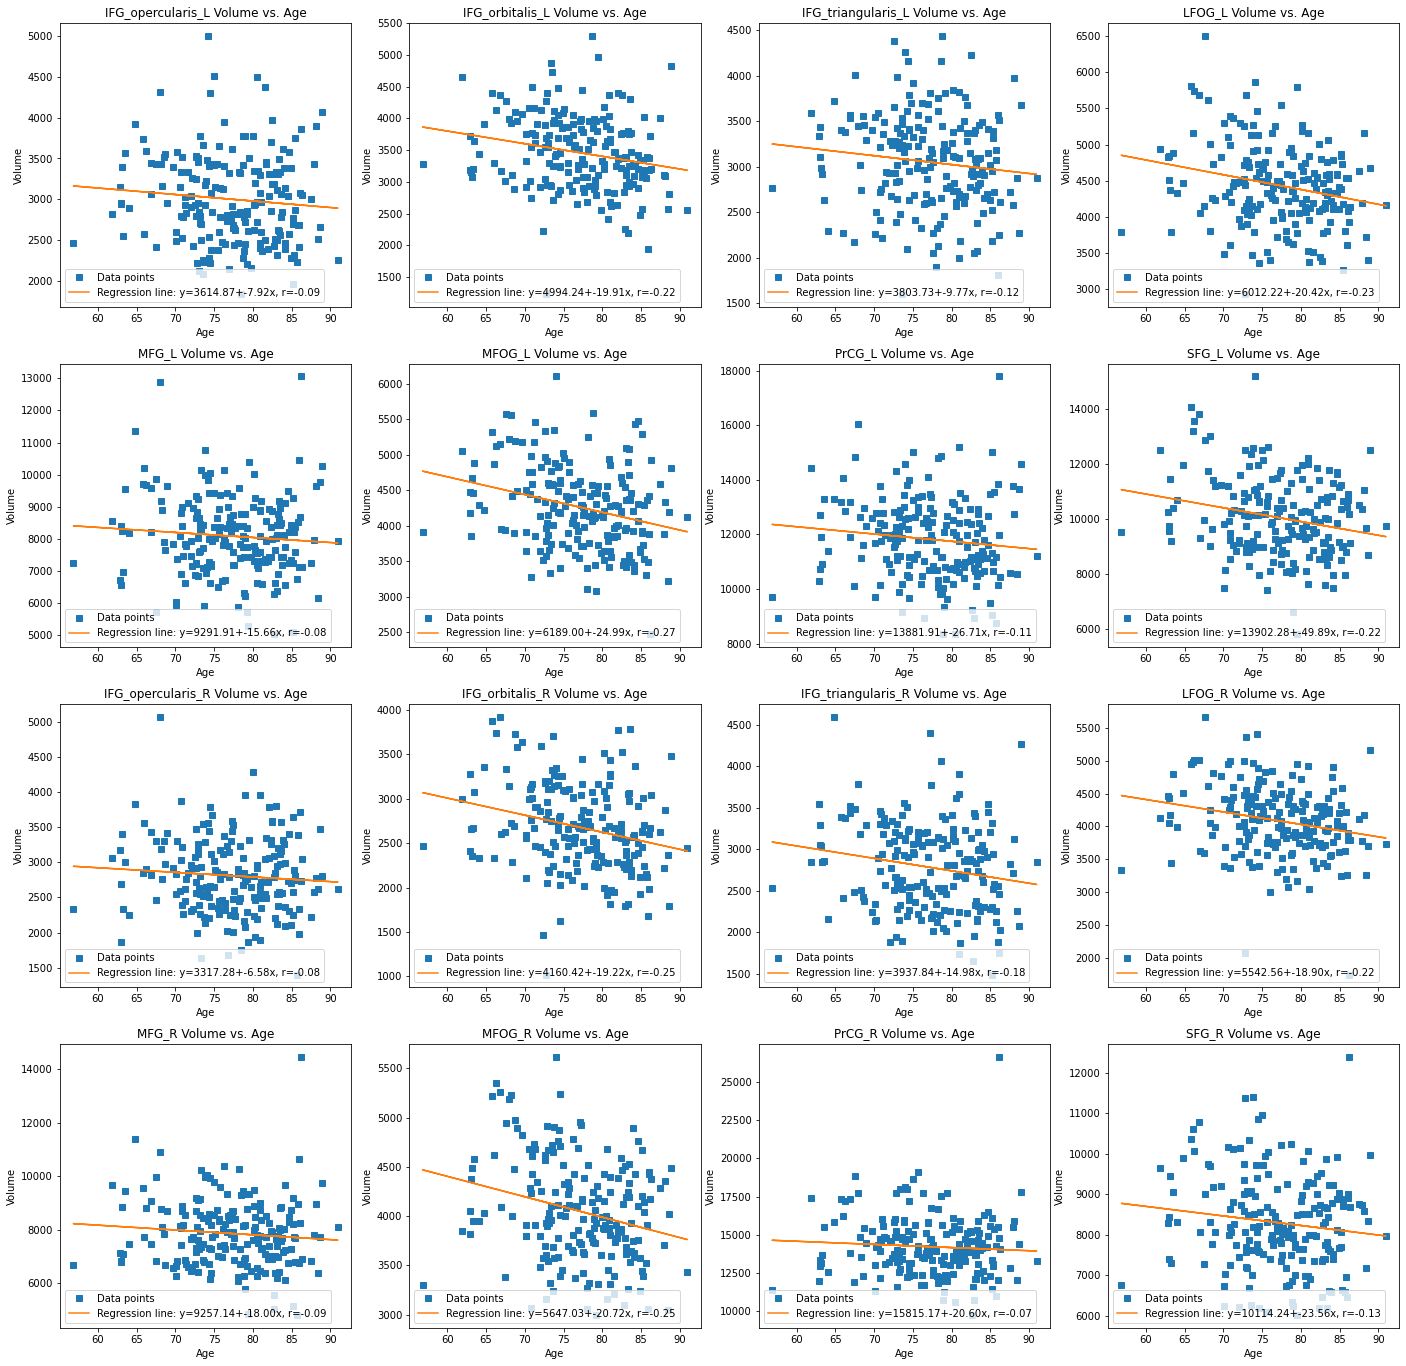

In [15]:
#Linear Regression

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(24, 24))

for i in range(0,16):
    slope, intercept, r, p, stderr = scipy.stats.linregress(dat_h_age['Age'], dat_h_age[rois[i]])
    line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'
    axes[i//4,i%4].plot(dat_h_age['Age'], dat_h_age[rois[i]], linewidth=0, marker='s', label='Data points')
    axes[i//4,i%4].plot(dat_h_age['Age'], intercept + slope * dat_h_age['Age'], label=line)
    axes[i//4,i%4].set_xlabel('Age')
    axes[i//4,i%4].set_ylabel('Volume')
    axes[i//4,i%4].set_title(rois[i]+' Volume vs. Age')
    axes[i//4,i%4].legend(facecolor='white',loc='lower left')
    
plt.show()

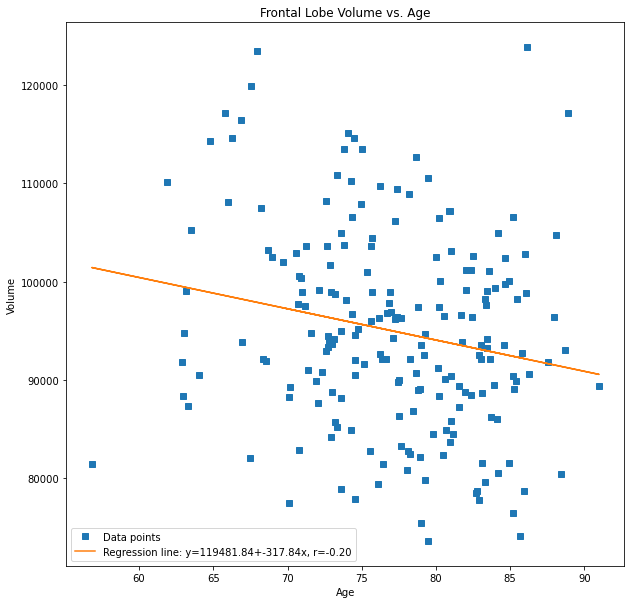

In [20]:
#Linear Regression (Frontal Lobe vs. Age)

slope, intercept, r, p, stderr = scipy.stats.linregress(dat_h_age['Age'], dat_h_age['Total_Frontal Lobe'])
line = f'Regression line: y={intercept:.2f}+{slope:.2f}x, r={r:.2f}'

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(dat_h_age['Age'], dat_h_age['Total_Frontal Lobe'], linewidth=0, marker='s', label='Data points')
ax.plot(dat_h_age['Age'], intercept + slope * dat_h_age['Age'], label=line)
ax.set_xlabel('Age')
ax.set_ylabel('Volume')
ax.set_title('Frontal Lobe Volume vs. Age')
ax.legend(facecolor='white',loc='lower left')

plt.show()


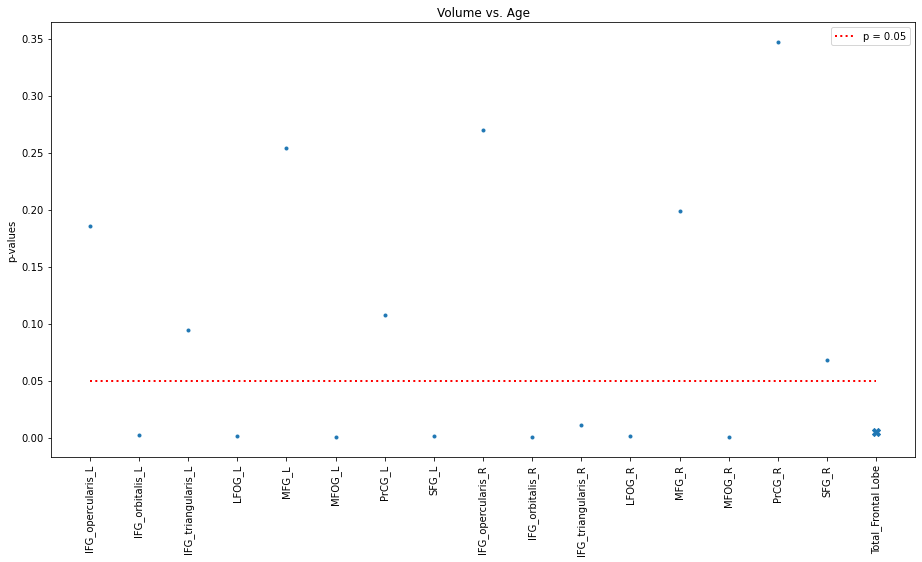

In [69]:
# plot p-values

rois_h_age = rois.copy()
rois_h_age.append('Total_Frontal Lobe')

list_pvalue = [] #create a list of p-values
for area in rois_h_age:
    (r, p) = scipy.stats.pearsonr(dat_h_age['Age'], dat_h_age[area])
    list_pvalue.append(p)
df_h_age = pd.DataFrame({'p-values': list_pvalue}, index=rois_h_age)

plt.figure(figsize=(15.5,8))
plt.plot(df_h_age['p-values'],'.', label='_nolegend_')
plt.scatter(16,df_h_age.loc['Total_Frontal Lobe'],s = 2*2**5, marker='X') #mark the Total one
plt.plot(np.arange(df_h_age.shape[0]), np.full(df_h_age.shape[0],0.05), 'r:', linewidth=2)
plt.xticks(rotation='vertical')
plt.ylabel('p-values')
plt.legend(['p = 0.05'], loc='upper right')
plt.title('Volume vs. Age');

# Random Forest


# End